In [1]:
##Importing the ncessary libraries
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
#Importing the Tesla data
#df = pdr.get_data_yahoo(symbols='TSLA', start=datetime(2010, 6, 29), end=datetime(2023, 9, 17))
df = yf.download('TSLA', start = '2010-06-29', end=datetime.now().date())

[*********************100%***********************]  1 of 1 completed


In [3]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [4]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2024-10-21,218.899994,220.479996,215.729996,218.850006,218.850006,47329000
2024-10-22,217.309998,218.220001,215.259995,217.970001,217.970001,43268700
2024-10-23,217.130005,218.720001,212.110001,213.649994,213.649994,80938900


In [5]:
##Checking for any Null Values
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
##Saving the downloaded dataset into a csv file
df.to_csv('TSLA.csv')

### Data Visualization

<Axes: xlabel='Date'>

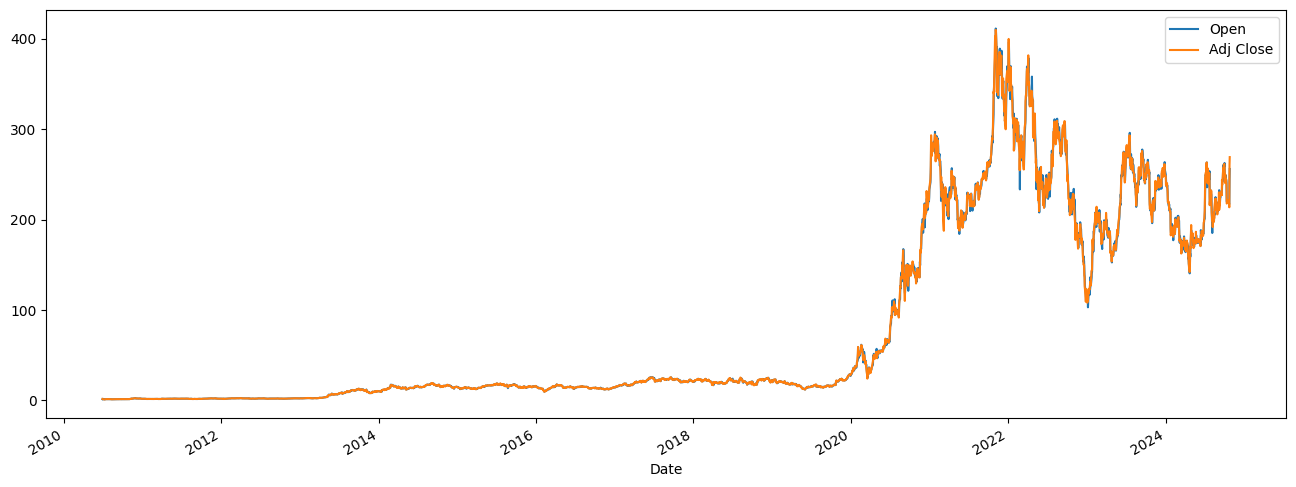

In [7]:
##Will change to an interactive graph
df[['Open', 'Adj Close']].plot(figsize=(16,6))

### Data Preprocessing

In [8]:
# # ##Train-test split
# # from sklearn.model_selection import train_test_split
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=0)

##Splitting based on timeline
split_point = int(len(df) * 0.8)
# Split into training and testing sets
X_train = X.iloc[:split_point]
y_train = y.iloc[:split_point]
X_test = X.iloc[split_point:]
y_test = y.iloc[split_point:]

In [9]:
X_train

,Open,High,Low,Volume
Date,,,,
2010-06-29,1.266667,1.666667,1.169333,281494500
2010-06-30,1.719333,2.028000,1.553333,257806500
2010-07-01,1.666667,1.728000,1.351333,123282000
2010-07-02,1.533333,1.540000,1.247333,77097000
2010-07-06,1.333333,1.333333,1.055333,103003500
...,...,...,...,...
2021-12-06,333.836670,340.546661,316.833344,81663000
2021-12-07,348.066681,352.556671,342.269989,56084700
2021-12-08,350.903320,357.459991,344.333344,41906400


### Linear Regression Model

In [10]:
reg = LinearRegression()

model = reg.fit(X_train, y_train)

In [11]:
model.coef_

array([-6.48767212e-01,  9.07437861e-01,  7.39639983e-01, -1.00414455e-10])

In [12]:
model.intercept_

0.002406813124402163

In [13]:
##Prediction and predicted values
y_pred = reg.predict(X_test)
y_pred

array([322.06418423, 317.24101918, 318.76626167, 313.16764207,
       316.86858795, 302.10708751, 304.36603435, 334.33709672,
       352.76612423, 369.65977697, 364.41794793, 358.70685989,
       361.51075452, 355.14898531, 395.17009476, 385.02453206,
       372.54774015, 347.7842214 , 342.32880548, 345.70896882,
       353.67354826, 368.34599306, 350.68579147, 347.49384528,
       352.383395  , 339.04882261, 341.78339082, 320.26048294,
       296.62218132, 312.712578  , 316.15048447, 285.46646781,
       274.80265853, 307.52148073, 306.32497294, 300.31196683,
       309.76928489, 306.48740073, 309.46232549, 304.96475228,
       310.84805259, 310.11689836, 290.07789761, 295.91002021,
       304.81472051, 304.7448988 , 295.83279626, 283.16268535,
       276.2602418 , 260.58205824, 263.84171232, 265.77399403,
       289.83790492, 291.58848329, 287.68560587, 283.36165325,
       278.62979811, 275.16879297, 277.90216153, 283.88496583,
       274.11054896, 269.23095444, 259.77816661, 262.53

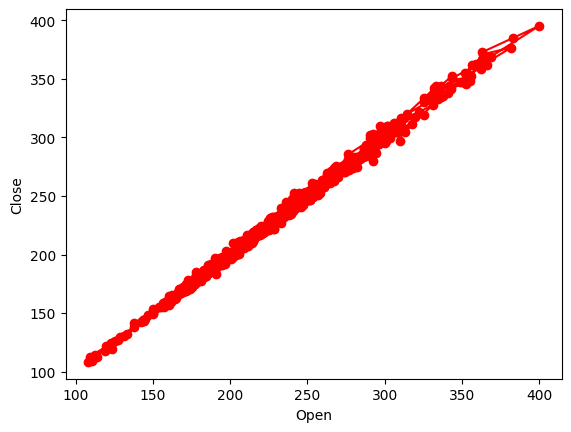

In [14]:
plt.xlabel('Open')
plt.ylabel('Close')
plt.plot(y_test, y_pred, color='red', marker='o')

In [15]:
##model performance
mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
print("Mean Squared Error : ", mse)
print("R-Squared :" , r2)

Mean Squared Error :  10.22709492227927
R-Squared : 0.9964461668512495


In [16]:
dfr=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
dfr

,Actual,Predicted
Date,,
2021-12-13,322.136658,322.064184
2021-12-14,319.503326,317.241019
2021-12-15,325.329987,318.766262
2021-12-16,308.973328,313.167642
2021-12-17,310.856659,316.868588
...,...,...
2024-10-21,218.850006,217.616941
2024-10-22,217.970001,216.250450
2024-10-23,213.649994,214.487299


In [17]:
dfr.to_csv('Predictions.csv')

In [18]:
dfr = pd.read_csv('Predictions.csv')
dfr

,Date,Actual,Predicted
0,2021-12-13,322.136658,322.064184
1,2021-12-14,319.503326,317.241019
2,2021-12-15,325.329987,318.766262
3,2021-12-16,308.973328,313.167642
4,2021-12-17,310.856659,316.868588
...,...,...,...
717,2024-10-21,218.850006,217.616941
718,2024-10-22,217.970001,216.250450
719,2024-10-23,213.649994,214.487299
720,2024-10-24,260.480011,258.572761


In [19]:
# Create the figure
fig = go.Figure()

# Add the 'Actual' data to the figure
fig.add_trace(go.Scatter(
    x=dfr['Date'],
    y=dfr['Actual'],
    mode='lines+markers',
    name='Actual',
    hovertemplate='<b>Date</b>: %{x}<br><b>Actual Price</b>: %{y:.2f}<extra></extra>',
    line=dict(color='blue'),
    marker=dict(size=5)
))

# Add the 'Predicted' data to the figure
fig.add_trace(go.Scatter(
    x=dfr['Date'],
    y=dfr['Predicted'],
    mode='lines+markers',
    name='Predicted',
    hovertemplate='<b>Date</b>: %{x}<br><b>Predicted Price</b>: %{y:.2f}<extra></extra>',
    line=dict(color='orange'),
    marker=dict(size=5)
))

# Customize the layout of the graph
fig.update_layout(
    title='Actual vs Predicted Prices',
    xaxis_title='Date',
    yaxis_title='Price',
    hovermode='x',  # Ensures the hover shows both Actual and Predicted at the same time
    template='plotly_dark',  # Optional: You can use other themes like 'plotly_white'
    width=1000,
    height=600
)

# Show the interactive plot
fig.show(renderer='browser')
